In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl

from tensorflow import keras
from tensorflow.keras import optimizers # lr 조정할때 쓰임
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

import seaborn as sns
import pandas as pd

np.random.seed(0)
tf.random.set_seed(0)

df = pd.read_csv('data-02-stock_daily.csv', header=1)
df

dataset_path = keras.utils.get_file("auto-mpg.data", 
                                    "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names, na_values = "?", comment='\t', sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.describe()

In [ ]:
dataset.isna().sum() # 데이터안에 누락된 데이터(isna) 의 합을 계산

In [ ]:
dataset = dataset.dropna() #na값을 드랍
dataset.isna().sum()

In [ ]:
origin = dataset.pop('Origin')

In [ ]:
dataset

In [ ]:
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

In [ ]:
df = dataset.sample(frac=1)
sns.pairplot(df[["MPG", "Cylinders", "Displacement", "Horsepower", "Weight"]], diag_kind="kde")

In [ ]:
x = df[["Cylinders", "Displacement", "Horsepower", "Weight","Acceleration", "Model Year", "USA", "Europe", "Japan"]]
y = pd.DataFrame(df["MPG"])

x_ss = StandardScaler().fit_transform(x)
y_ss = StandardScaler().fit_transform(y)
plt.boxplot(x_ss)
plt.show()


In [ ]:
x_train=x_ss[220:,:]
x_test=x_ss[:220,:]
y_train=y_ss[220:,:]
y_test=y_ss[:220,:]

x_train, x_test, y_train, y_test = train_test_split(x_ss, y_ss, test_size = 0.3, random_state=0)

model = Sequential()
model.add(Dense(1000, input_dim=len(x.keys()), activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

# 모델 학습과정 설정
model.compile(loss='mean_squared_error', optimizer=optimizers.Adam(lr=0.001), metrics=['mse'])

early_stopping_callback = EarlyStopping(monitor='mse', patience=10)

#모델저장조건 설정
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'

checkpointer = ModelCheckpoint(filepath = modelpath, monitor='loss', verbose=1,save_best_only = True)

history = model.fit(x_train, y_train, validation_split=0.33, epochs=100, batch_size=10, verbose=0,
                    callbacks=[early_stopping_callback, checkpointer])

#테스트셋으로 실험 오차값 저장
y_loss = history.history['loss']
y_mse = history.history['mse']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_loss, "o", c="red", markersize=3, label='loss')
plt.plot(x_len, y_mse, "o", c="pink", markersize=3, label='mse')
plt.legend()
plt.show()

res = model.evaluate(x_test, y_test, batch_size=32)

y_predict = model.predict(x_test)

plt.figure()
plt.plot(y_predict, c='red', label='predict')
plt.plot(y_test, c='blue', label='actual')
plt.legend(prop={'size' : 10})
print("Evaluate :{} ".format(np.average((y_predict - y_test)**2)))

              count         mean         std     min      25%     50%  \
Cylinders     314.0     5.477707    1.699788     3.0     4.00     4.0   
Displacement  314.0   195.318471  104.331589    68.0   105.50   151.0   
Horsepower    314.0   104.869427   38.096214    46.0    76.25    94.5   
Weight        314.0  2990.251592  843.898596  1649.0  2256.50  2822.5   
Acceleration  314.0    15.559236    2.789230     8.0    13.80    15.5   
Model Year    314.0    75.898089    3.675642    70.0    73.00    76.0   
USA           314.0     0.624204    0.485101     0.0     0.00     1.0   
Europe        314.0     0.178344    0.383413     0.0     0.00     0.0   
Japan         314.0     0.197452    0.398712     0.0     0.00     0.0   

                  75%     max  
Cylinders        8.00     8.0  
Displacement   265.75   455.0  
Horsepower     128.00   225.0  
Weight        3608.00  5140.0  
Acceleration    17.20    24.8  
Model Year      79.00    82.0  
USA              1.00     1.0  
Europe       

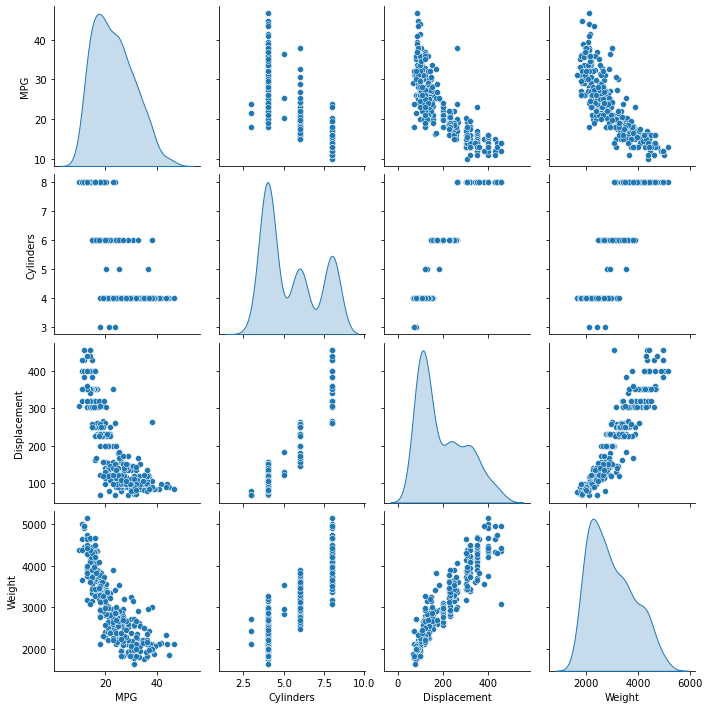

In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers # lr 조정할때 쓰임
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import seaborn as sns
import pandas as pd

np.random.seed(0)
tf.random.set_seed(0)

dataset_path = keras.utils.get_file("auto-mpg.data", 
                                    "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(dataset_path, names=column_names, na_values = "?", comment='\t',sep=" ", skipinitialspace=True)
dataset = raw_dataset.copy()

dataset.isna().sum()

dataset = dataset.dropna()

origin = dataset.pop('Origin')

dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

train_stats = train_dataset.describe()
train_stats.pop('MPG')

train_stats = train_stats.transpose()
print(train_stats)

train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']  #  

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

model = tf.keras.Sequential()
model.add(keras.layers.Dense(64, input_shape=[len(train_dataset.keys())], activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1))

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae', 'mse'])

example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
print(example_result)

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print("")
        print(".", end='')
        
EPOCHS = 1000

history = model.fit(normed_train_data, train_labels, validation_split=0.2, epochs=EPOCHS, verbose=0,
                    callbacks=[PrintDot()])


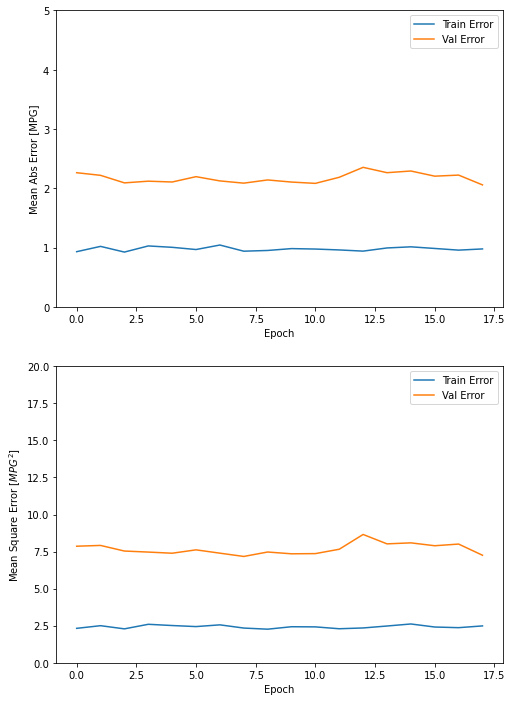

In [15]:

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    plt.figure(figsize=(8,12))
    
    plt.subplot(2,1,1,)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'],label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],label='Val Error')
    plt.ylim([0,5]) #y 축 범위 설정
    plt.legend()
    
    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]') # 텍스트 마크업표현!! $ 기호 안에 넣으면 수학기호가됨
    plt.plot(hist['epoch'], hist['mse'],label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],label='Val Error')
    plt.ylim([0,20]) #y 축 범위 설정
    plt.legend()
    
    plt.show()

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, validation_split=0.2, epochs=EPOCHS, verbose=0,
                    callbacks=[early_stopping, PrintDot()])

plot_history(history)

실제 최소 = 10.229816, 실제 최대 = 42.581074, 오차 평균 = 2.211594
예상 최소 = 9.000000, 실제 최대 = 44.300000


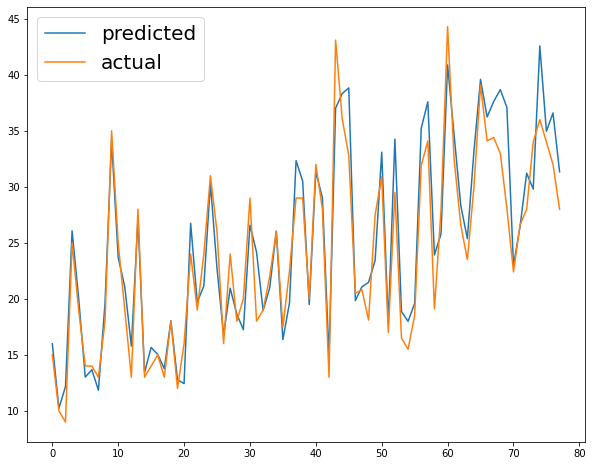

In [18]:
Y_prediction = model.predict(normed_test_data).flatten()
plt.figure(figsize=(10,8))
plt.plot(Y_prediction, label='predicted')
plt.plot(test_labels.values, label = 'actual')
plt.legend(prop={'size' : 20})

avr = abs(Y_prediction - test_labels).mean()

print('실제 최소 = %f, 실제 최대 = %f, 오차 평균 = %f'%(min(Y_prediction), max(Y_prediction),avr))
print('예상 최소 = %f, 실제 최대 = %f'%(min(test_labels), max(test_labels)))